In [13]:
import os

import torch
from PIL import Image

%run scorers.py

In [2]:
A = torch.rand((3, 3, 512, 512)).cuda()

In [3]:
ims = []
ex_path = '../../../data_examples/real/'

for image in os.listdir(ex_path):
    ims.append(Image.open(os.path.join(ex_path, image)))

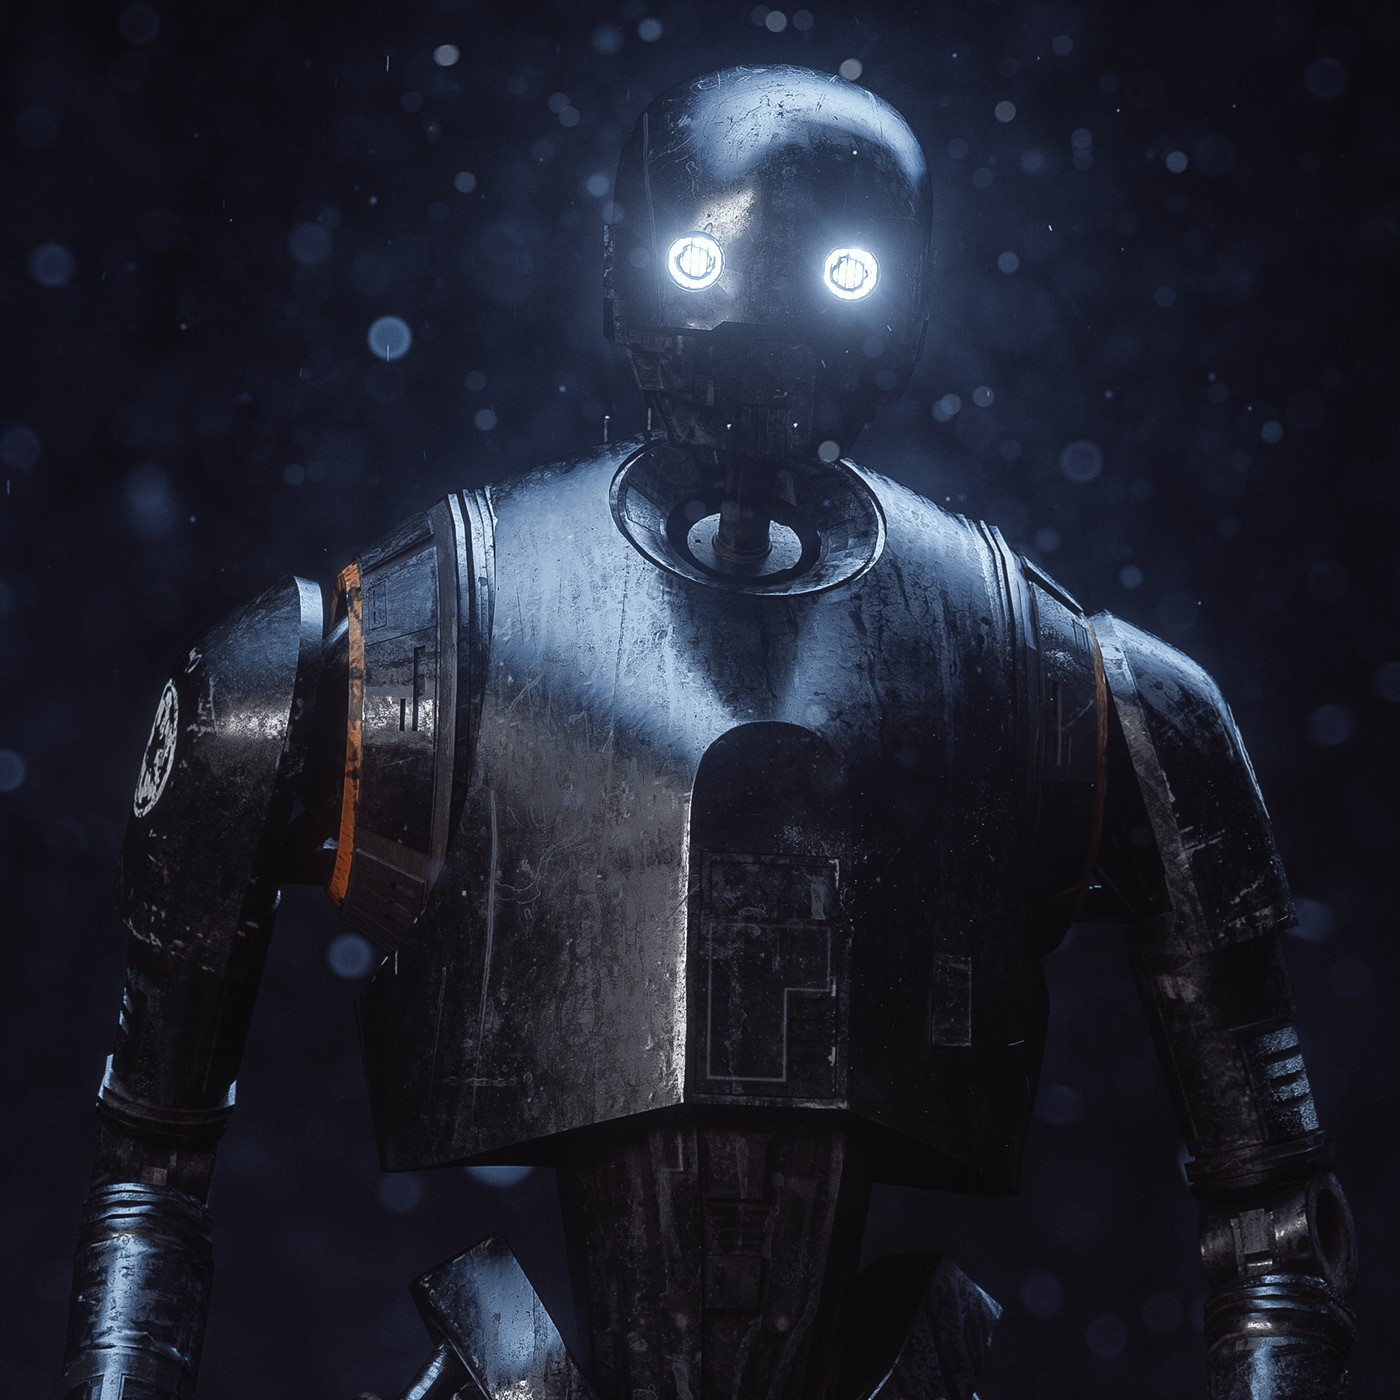

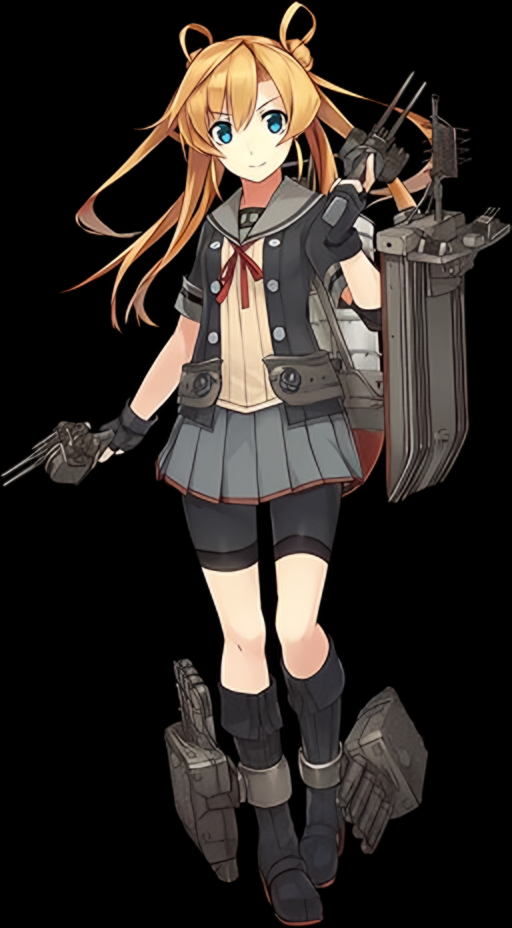

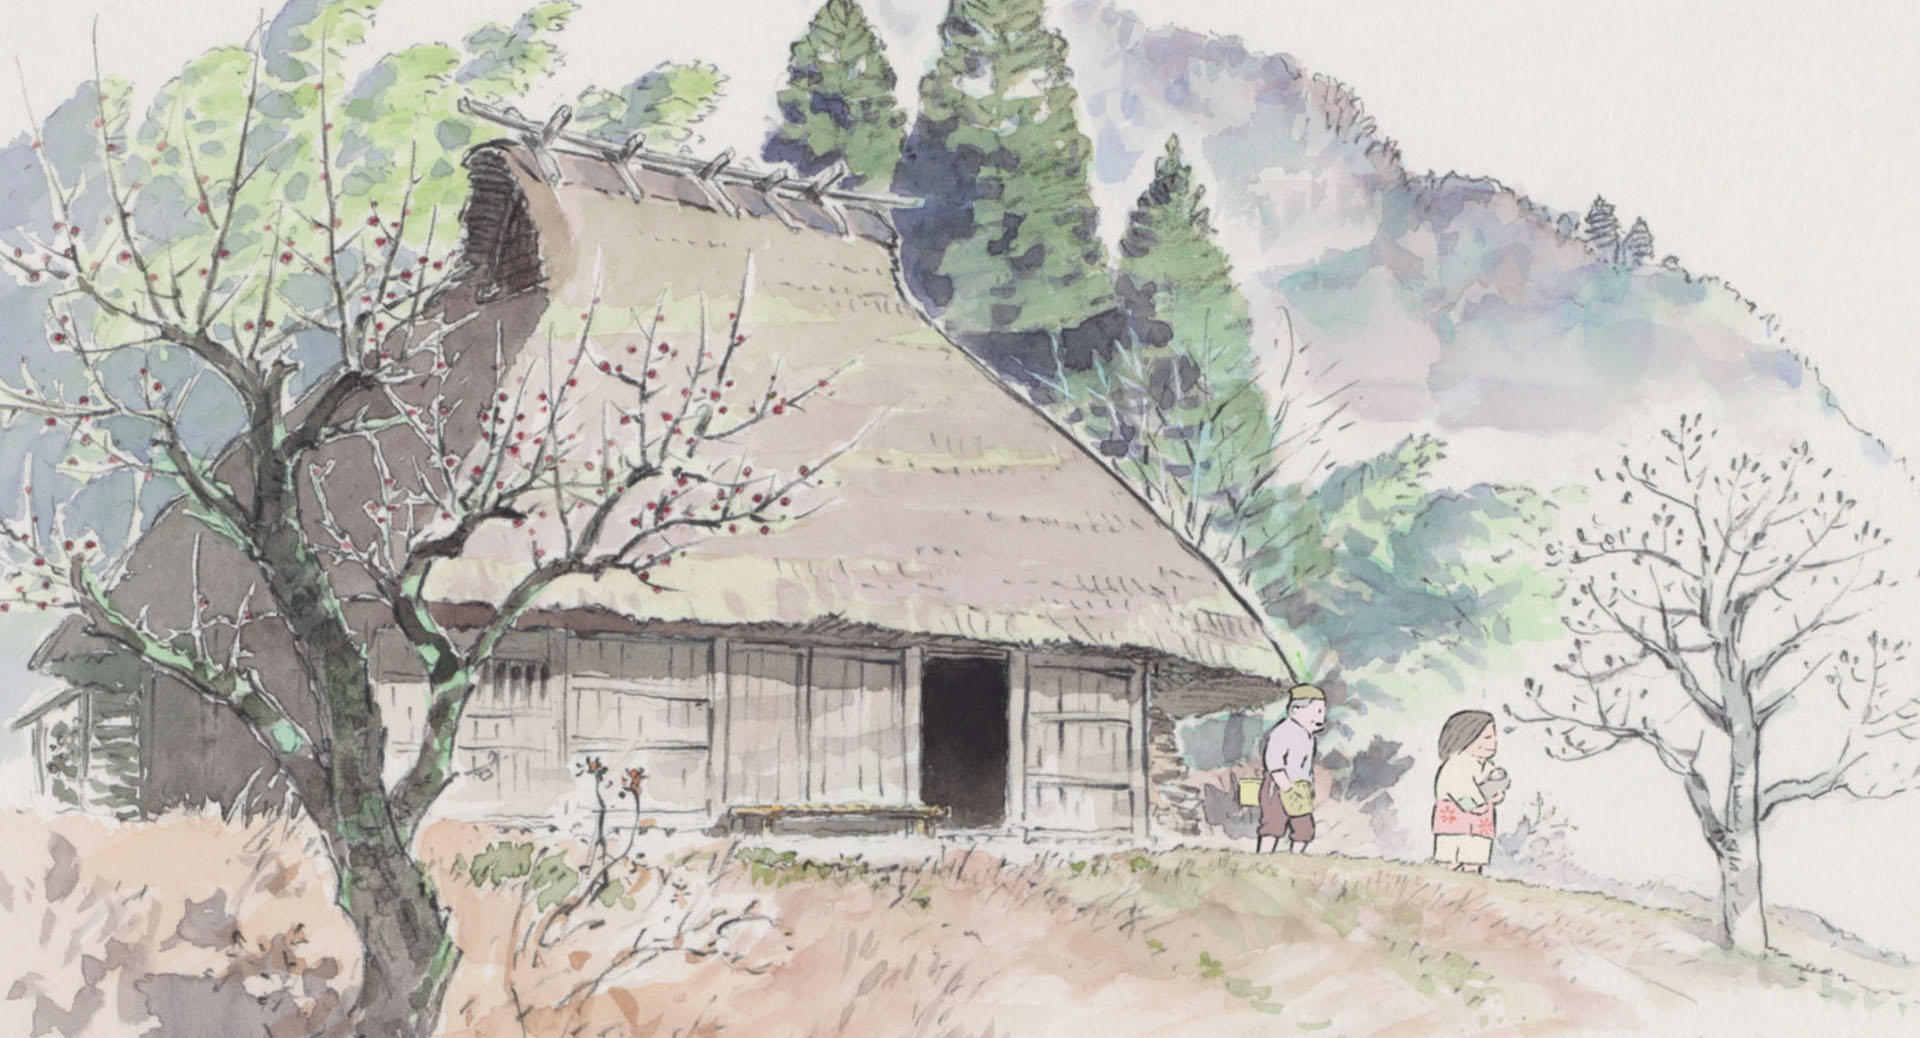

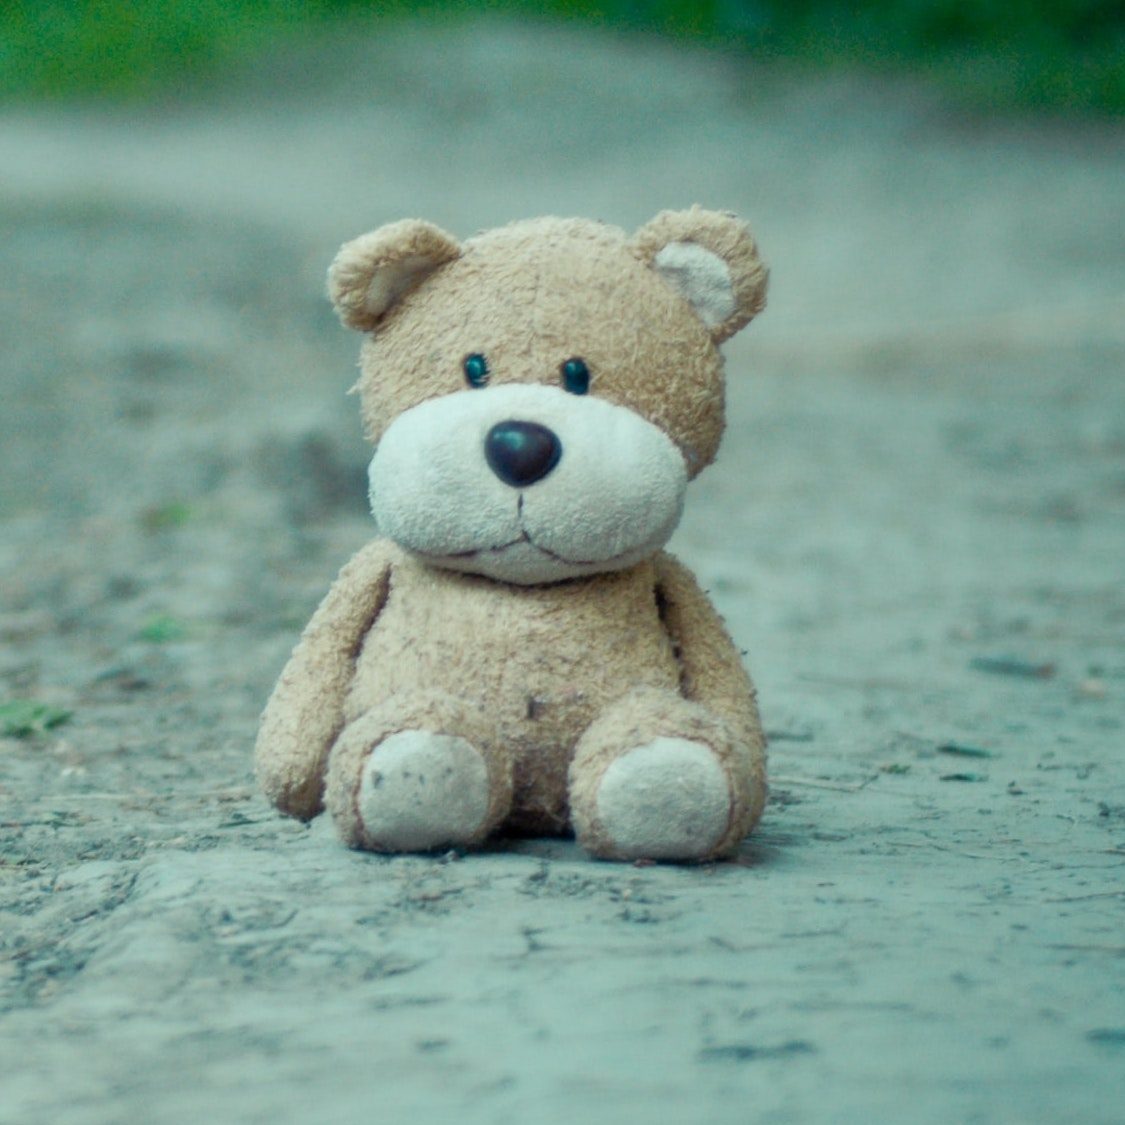

In [4]:
for im in ims:
    display(im)

## Scorers

In [13]:
scorer = LiqeScorer('../checkpoints/LIQE.pt', resize_mode='padding')

Warning, padding is used while the model can accept rectangle input


In [5]:
scorer(A)

tensor([2.6641, 2.6680, 2.6523], device='cuda:0', dtype=torch.float16,
       grad_fn=<AddBackward0>)

In [14]:
tfs = scorer.transform
tensors = []
for im in ims:
    tensor = tfs(im).cuda()
    print(scorer(tensor.unsqueeze(0)))
    tensors.append(tensor)
print(scorer(torch.stack(tensors)))

tensor([3.0703], device='cuda:0', dtype=torch.float16, grad_fn=<AddBackward0>)
tensor([3.1289], device='cuda:0', dtype=torch.float16, grad_fn=<AddBackward0>)
tensor([2.5645], device='cuda:0', dtype=torch.float16, grad_fn=<AddBackward0>)
tensor([2.8281], device='cuda:0', dtype=torch.float16, grad_fn=<AddBackward0>)
tensor([3.0332, 3.1367, 2.6680, 2.7988], device='cuda:0', dtype=torch.float16,
       grad_fn=<AddBackward0>)


In [5]:
scorer = ManiqaScorer('../checkpoints/ckpt_koniq10k.pt', resize_mode='resize')

/home/bangbang/miniconda3/envs/kohya/lib/python3.10/site-packages/safetensors/torch.py:98: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  with safe_open(filename, framework="pt", device=device) as f:
/home/bangbang/miniconda3/envs/kohya/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
scorer(A, n_patches=10)

tensor([0.3739, 0.3703, 0.3679], device='cuda:0', grad_fn=<MeanBackward1>)

In [10]:
torch.cuda.empty_cache()

In [9]:
tfs = scorer.transform
tensors = []
for im in ims:
    tensor = tfs(im).cuda()
    print(scorer(tensor.unsqueeze(0), n_patches=10))
    tensors.append(tensor)

tensor([0.3948], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([0.4324], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([0.2794], device='cuda:0', grad_fn=<MeanBackward1>)
tensor([0.3500], device='cuda:0', grad_fn=<MeanBackward1>)


In [15]:
scorer = ArtifactScorer(
    '../checkpoints/aesthetics_scorer_artifacts_openclip_vit_l_14.pth',
    resize_mode='padding', image_size=224)

In [17]:
B = torch.rand((3, 3, 224, 224)).cuda()
scorer(B)

tensor([2.3940, 2.3721, 2.3974], device='cuda:0',
       grad_fn=<ReshapeAliasBackward0>)

In [20]:
tfs = scorer.transform
tensors = []
for im in ims:
    tensor = tfs(im).cuda()
    print(scorer(tensor.unsqueeze(0)))
    tensors.append(tensor)
print(scorer(torch.stack(tensors)))

tensor([1.2620], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)
tensor([3.0253], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)
tensor([1.8656], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)
tensor([1.6723], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)
tensor([1.2620, 3.0253, 1.8656, 1.6723], device='cuda:0',
       grad_fn=<ReshapeAliasBackward0>)
